In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

from ldm.util import instantiate_from_config
from omegaconf import OmegaConf
import torch
from PIL import Image
from torchvision.transforms import Compose, ToTensor, Resize, ToPILImage
from torchvision.transforms.functional import to_pil_image

In [2]:
config_path = '/home/admin_mcn/hungvq/MedSegDiff/logs/2023-05-02T17-25-50_seg_diff_autoencoder/configs/2023-05-02T17-25-50-project.yaml'
ckpt_path = '/home/admin_mcn/hungvq/MedSegDiff/logs/2023-05-02T17-25-50_seg_diff_autoencoder/checkpoints/last.ckpt'

In [3]:
config = OmegaConf.load(config_path)
model = instantiate_from_config(config.model)

making attention of type 'vanilla' with 256 in_channels
Working with z of shape (1, 32, 12, 12) = 4608 dimensions.
making attention of type 'vanilla' with 256 in_channels
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


In [ ]:
ckpt = torch.load(ckpt_path, map_location='cpu')
model.load_state_dict(ckpt['state_dict'])
model.eval()

In [42]:
img = np.load("/home/admin_mcn/hungvq/DiffUnet/output/ISIC_0000021.npy")
img.shape
z = torch.from_numpy(img)
x = model.decode(z)
x.shape

torch.Size([1, 3, 384, 384])

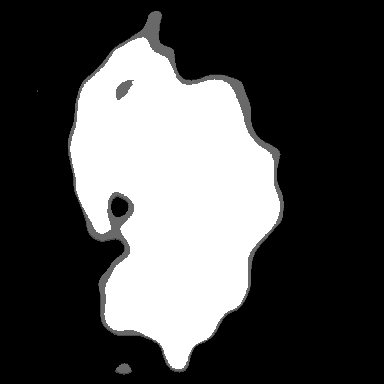

In [43]:
x = torch.sigmoid(x)
x = (x > 0.75).float()
to_pil_image(x[0], mode='RGB').convert('L')

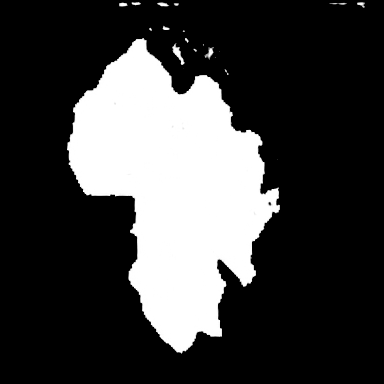

In [44]:
img_ori = img = np.load("/home/admin_mcn/thaotlp/data/ISIC/latent_gt/ISIC_0000021.npy") 
z_ori = torch.from_numpy(img_ori)
x_ori = model.decode(z_ori)
to_pil_image(torch.clamp(x_ori[0].squeeze(0),min=0,max=1), mode='RGB').convert('L')

In [1]:
import os
from PIL import Image

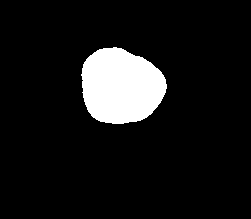

In [67]:
Image.open('/home/admin_mcn/hungvq/out_data/' + os.listdir('/home/admin_mcn/hungvq/out_data')[77])